# 라이브러리 및 데이터 불러오기

In [167]:
import pandas as pd
import numpy as np
from datetime import datetime, date, time

# 데이터 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')  # matplotlib style 설정

# 한글 폰트를 적용하는 코드
import matplotlib
import matplotlib.font_manager as fm
fm._rebuild()
fm.get_fontconfig_fonts()
font_location = 'data/NanumBarunGothic.ttf' # 폰트 파일 이름, 디렉토리 주의
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

# 문법 변경에 의한 경고를 무시
import warnings

warnings.filterwarnings('ignore')

# matplotlib 시각화 결과를 jupyter notebook에서 바로 볼 수 있게 해주는 command
%matplotlib inline

In [168]:
# 데이터 불러오기
js_q1=pd.read_excel('data/coupang_eats_2021-Q1.xlsx')
js_q2=pd.read_excel('data/coupang_eats_2021-Q2.xlsx')
js_q3=pd.read_excel('data/coupang_eats_2021-Q3.xlsx')

**2021.01.01 ~ 2021.09.30**

# Data Cleansing

## Q1

In [169]:
js_q1.head()

,거래일,거래일시,결제유형,주문아이디,브랜드명,상점명,거래유형,주문내역,총금액,주문금액,...,기본요금,Unnamed: 14,Unnamed: 15,프로모션요금,Unnamed: 17,고객부담배달비,프로모션혜택금액,최종요금,Unnamed: 21,정산금액
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,서비스수수료,카드수수료 및 결제이용료,배달수수료,주문중개수수료,배달요금,NaN,NaN,총공급가액,총부가세액,NaN
1,2021-01-01,2021-01-01 12:03:57,CREDIT,2VUCR0,NaN,제이스레시피,PAY,"치아바타, 블랙올리브 치아바타, 바게트, 스콘",15200.0,12200.0,...,1830,366,6000,1000,5000,2727.0,4557.0,3639,364,8197.0
2,2021-01-01,2021-01-01 12:10:50,CREDIT,1BW780,NaN,제이스레시피,PAY,"뺑오쇼콜라x2, 크로와상, 치아바타, 먹물 유자 크림치즈, 크렌베리 스콘",22200.0,19200.0,...,2880,576,6000,1000,5000,2727.0,5607.0,3849,385,14966.0
3,2021-01-01,2021-01-01 14:29:07,CHECK,2RJPG0,NaN,제이스레시피,PAY,"스콘, 치아바타x2, 호두 크렌베리 캉파뉴, 올리브오일, 레몬 마들렌x2",20000.0,17000.0,...,2550,510,6000,1000,5000,2727.0,5277.0,3783,378,12839.0
4,2021-01-01,2021-01-01 14:46:06,CREDIT,17XM80,NaN,제이스레시피,PAY,"크렌베리 스콘x2, 크렌베리 치아바타x2, 먹물 유자 크림치즈, 아몬드 크로와상, ...",24700.0,21700.0,...,3255,651,6000,1000,5000,2727.0,5982.0,3924,392,17384.0


In [170]:
js_q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   거래일          178 non-null    object        
 1   거래일시         178 non-null    datetime64[ns]
 2   결제유형         178 non-null    object        
 3   주문아이디        178 non-null    object        
 4   브랜드명         0 non-null      float64       
 5   상점명          178 non-null    object        
 6   거래유형         178 non-null    object        
 7   주문내역         178 non-null    object        
 8   총금액          178 non-null    float64       
 9   주문금액         178 non-null    float64       
 10  결제금액         178 non-null    float64       
 11  쿠팡부담할인금액     178 non-null    float64       
 12  상점부담할인금액     178 non-null    float64       
 13  기본요금         179 non-null    object        
 14  Unnamed: 14  179 non-null    object        
 15  Unnamed: 15  179 non-null    object        
 16  프로모션요금  

**js_q1**
- 거래일, 브랜드명, 상점명 drop
- 기본요금 -> 서비스수수료, Unnamed: 14 -> 카드수수료_결제이용료, Unnamed: 15 -> 배달수수료, 프로모션요금 -> 주문중개수수료, Unnamed: 17 -> 배달요금, 최종요금 -> 총공급가액, Unnamed: 21 -> 총부가세액
- 0행 지우기

In [171]:
# 불필요한 행 drop
js_q1.drop(['거래일', '브랜드명', '상점명'], axis=1, inplace=True)

In [172]:
# 열 이름 변경
js_q1.rename(columns={'기본요금':'서비스수수료', 'Unnamed: 14':'카드수수료_결제이용료', 'Unnamed: 15':'배달수수료',
                      '프로모션요금':'주문중개수수료', 'Unnamed: 17':'배달요금', '최종요금':'총공급가액', 'Unnamed: 21':'총부가세액'}, inplace=True)
js_q1.drop(0, axis=0, inplace=True)

In [173]:
# q2, q3에 맞춰 최종요금 총액 행 만들기
js_q1['최종요금총액']=js_q1.총공급가액+js_q1.총부가세액

In [174]:
# 행 정렬
temp=js_q1.정산금액
js_q1.drop(['정산금액'], axis=1, inplace=True)
js_q1.loc[:,'정산금액']=temp

In [175]:
# 고객 부담 배달비 총액이 3000원이므로 고객부담배달비 열을 '고객부담배달비총액' 으로 변경후 +/- 3000으로 변경
js_q1.rename(columns={'고객부담배달비':'고객부담배달비총액'}, inplace=True)
js_q1['고객부담배달비총액']=js_q1['고객부담배달비총액'].apply(lambda x: 3000 if (x>0) else -3000).astype('float')

In [176]:
js_q1.reset_index(drop=True, inplace=True)

In [177]:
js_q1.head()

,거래일시,결제유형,주문아이디,거래유형,주문내역,총금액,주문금액,결제금액,쿠팡부담할인금액,상점부담할인금액,...,카드수수료_결제이용료,배달수수료,주문중개수수료,배달요금,고객부담배달비총액,프로모션혜택금액,총공급가액,총부가세액,최종요금총액,정산금액
0,2021-01-01 12:03:57,CREDIT,2VUCR0,PAY,"치아바타, 블랙올리브 치아바타, 바게트, 스콘",15200.0,12200.0,13200.0,2000.0,0.0,...,366,6000,1000,5000,3000.0,4557.0,3639,364,4003,8197.0
1,2021-01-01 12:10:50,CREDIT,1BW780,PAY,"뺑오쇼콜라x2, 크로와상, 치아바타, 먹물 유자 크림치즈, 크렌베리 스콘",22200.0,19200.0,20200.0,2000.0,0.0,...,576,6000,1000,5000,3000.0,5607.0,3849,385,4234,14966.0
2,2021-01-01 14:29:07,CHECK,2RJPG0,PAY,"스콘, 치아바타x2, 호두 크렌베리 캉파뉴, 올리브오일, 레몬 마들렌x2",20000.0,17000.0,18000.0,2000.0,0.0,...,510,6000,1000,5000,3000.0,5277.0,3783,378,4161,12839.0
3,2021-01-01 14:46:06,CREDIT,17XM80,PAY,"크렌베리 스콘x2, 크렌베리 치아바타x2, 먹물 유자 크림치즈, 아몬드 크로와상, ...",24700.0,21700.0,22700.0,2000.0,0.0,...,651,6000,1000,5000,3000.0,5982.0,3924,392,4316,17384.0
4,2021-01-01 16:39:16,BANK,2RVT80,PAY,"먹물 치즈 치아바타, 뺑오쇼콜라, 크렌베리 치아바타x2",16200.0,13200.0,14200.0,2000.0,0.0,...,396,6000,1000,5000,3000.0,4707.0,3669,367,4036,9164.0


In [178]:
js_q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   거래일시         178 non-null    datetime64[ns]
 1   결제유형         178 non-null    object        
 2   주문아이디        178 non-null    object        
 3   거래유형         178 non-null    object        
 4   주문내역         178 non-null    object        
 5   총금액          178 non-null    float64       
 6   주문금액         178 non-null    float64       
 7   결제금액         178 non-null    float64       
 8   쿠팡부담할인금액     178 non-null    float64       
 9   상점부담할인금액     178 non-null    float64       
 10  서비스수수료       178 non-null    object        
 11  카드수수료_결제이용료  178 non-null    object        
 12  배달수수료        178 non-null    object        
 13  주문중개수수료      178 non-null    object        
 14  배달요금         178 non-null    object        
 15  고객부담배달비총액    178 non-null    float64       
 16  프로모션혜택금액

## Q2

In [179]:
js_q2.head()

,거래일,거래일시,결제유형,주문아이디,브랜드명,상점명,거래유형,주문내역,총금액,주문금액,...,Unnamed: 15,프로모션요금,Unnamed: 17,고객부담배달비,고객부담배달비 (총액),프로모션혜택금액,최종요금,Unnamed: 22,Unnamed: 23,정산금액
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,배달수수료,주문중개수수료,배달요금,NaN,NaN,NaN,총공급가액,총부가세액,총액,NaN
1,2021-04-01,2021-04-01 14:02:12,CHECK,1BPC80,NaN,제이스레시피,PAY,"바게트x2, 호두 크렌베리 캉파뉴, 치아바타",17000.0,14000.0,...,6000,1000,5000,2727.0,3000.0,4827.0,3693,369,4062,9938.0
2,2021-04-01,2021-04-01 16:27:36,CHECK,1TBK00,NaN,제이스레시피,PAY,"호두 크렌베리 캉파뉴, 초코 브리오슈, 아메리카노, 멀티그레인 빵드미",18900.0,15900.0,...,6000,1000,5000,2727.0,3000.0,5112.0,3750,375,4125,11775.0
3,2021-04-02,2021-04-02 14:47:50,BANK,1S3080,NaN,제이스레시피,PAY,"먹물 유자 크림치즈x2, 먹물 치즈 치아바타x2, 녹차 스콘, 무화과 사워도우, 치...",34800.0,31800.0,...,6000,1000,5000,2727.0,3000.0,7497.0,4227,422,4649,27151.0
4,2021-04-03,2021-04-03 12:53:39,CHECK,2K6A00,NaN,제이스레시피,PAY,"블랙올리브 치아바타, 크렌베리 스콘, 먹물 치즈 치아바타x2",18000.0,15000.0,...,6000,1000,5000,2727.0,3000.0,4977.0,3723,372,4095,10905.0


In [180]:
js_q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   거래일           264 non-null    object        
 1   거래일시          264 non-null    datetime64[ns]
 2   결제유형          264 non-null    object        
 3   주문아이디         264 non-null    object        
 4   브랜드명          0 non-null      float64       
 5   상점명           264 non-null    object        
 6   거래유형          264 non-null    object        
 7   주문내역          264 non-null    object        
 8   총금액           264 non-null    float64       
 9   주문금액          264 non-null    float64       
 10  결제금액          264 non-null    float64       
 11  쿠팡부담할인금액      264 non-null    float64       
 12  상점부담할인금액      264 non-null    float64       
 13  기본요금          265 non-null    object        
 14  Unnamed: 14   265 non-null    object        
 15  Unnamed: 15   265 non-null    object    

**js_q2**
- 거래일, 브랜드명, 상점명 고객부담배달비 drop
- 기본요금 -> 서비스수수료, Unnamed: 14 -> 카드수수료_결제이용료, Unnamed: 15 -> 배달수수료, 프로모션요금 -> 주문중개수수료, Unnamed: 17 -> 배달요금, 고객부담배달비 (총액) -> 고객부담배달비총액, 최종요금 -> 총공급가액, Unnamed: 22 -> 총부가세액, Unnamed: 23 -> 최종요금총액
- 0행 지우기

In [181]:
# 불필요한 행 drop
js_q2.drop(['거래일', '브랜드명', '상점명', '고객부담배달비'], axis=1, inplace=True)

In [182]:
# 행 이름 변경
js_q2.rename(columns={'기본요금':'서비스수수료', 'Unnamed: 14':'카드수수료_결제이용료', 'Unnamed: 15':'배달수수료',
                      '프로모션요금':'주문중개수수료', 'Unnamed: 17':'배달요금', '고객부담배달비 (총액)':'고객부담배달비총액',
                      '최종요금':'총공급가액', 'Unnamed: 22':'총부가세액', 'Unnamed: 23':'최종요금총액'}, inplace=True)
js_q2.drop(0, axis=0, inplace=True)

In [183]:
js_q2.reset_index(drop=True, inplace=True)

In [184]:
js_q2.head()

,거래일시,결제유형,주문아이디,거래유형,주문내역,총금액,주문금액,결제금액,쿠팡부담할인금액,상점부담할인금액,...,카드수수료_결제이용료,배달수수료,주문중개수수료,배달요금,고객부담배달비총액,프로모션혜택금액,총공급가액,총부가세액,최종요금총액,정산금액
0,2021-04-01 14:02:12,CHECK,1BPC80,PAY,"바게트x2, 호두 크렌베리 캉파뉴, 치아바타",17000.0,14000.0,14000.0,3000.0,0.0,...,420,6000,1000,5000,3000.0,4827.0,3693,369,4062,9938.0
1,2021-04-01 16:27:36,CHECK,1TBK00,PAY,"호두 크렌베리 캉파뉴, 초코 브리오슈, 아메리카노, 멀티그레인 빵드미",18900.0,15900.0,17900.0,1000.0,0.0,...,477,6000,1000,5000,3000.0,5112.0,3750,375,4125,11775.0
2,2021-04-02 14:47:50,BANK,1S3080,PAY,"먹물 유자 크림치즈x2, 먹물 치즈 치아바타x2, 녹차 스콘, 무화과 사워도우, 치...",34800.0,31800.0,34800.0,0.0,0.0,...,954,6000,1000,5000,3000.0,7497.0,4227,422,4649,27151.0
3,2021-04-03 12:53:39,CHECK,2K6A00,PAY,"블랙올리브 치아바타, 크렌베리 스콘, 먹물 치즈 치아바타x2",18000.0,15000.0,18000.0,0.0,0.0,...,450,6000,1000,5000,3000.0,4977.0,3723,372,4095,10905.0
4,2021-04-03 12:55:31,BANK,1KDAG0,PAY,"크렌베리 치아바타, 병아리콩 치아바타x2, 먹물 치즈 치아바타",15600.0,12600.0,15600.0,0.0,0.0,...,378,6000,1000,5000,3000.0,4617.0,3651,365,4016,8584.0


In [185]:
js_q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   거래일시         264 non-null    datetime64[ns]
 1   결제유형         264 non-null    object        
 2   주문아이디        264 non-null    object        
 3   거래유형         264 non-null    object        
 4   주문내역         264 non-null    object        
 5   총금액          264 non-null    float64       
 6   주문금액         264 non-null    float64       
 7   결제금액         264 non-null    float64       
 8   쿠팡부담할인금액     264 non-null    float64       
 9   상점부담할인금액     264 non-null    float64       
 10  서비스수수료       264 non-null    object        
 11  카드수수료_결제이용료  264 non-null    object        
 12  배달수수료        264 non-null    object        
 13  주문중개수수료      264 non-null    object        
 14  배달요금         264 non-null    object        
 15  고객부담배달비총액    264 non-null    float64       
 16  프로모션혜택금액

## Q3

In [186]:
js_q3.head()

,거래일,거래일시,주문유형,결제유형,주문아이디,브랜드명,상점명,거래유형,주문내역,총금액,...,고객부담배달비,고객부담배달비 (총액),프로모션혜택금액,최종요금,Unnamed: 23,Unnamed: 24,광고비,Unnamed: 26,Unnamed: 27,정산금액
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,총공급가액,총부가세액,총액,총공급가액,총부가세액,총액,NaN
1,2021-07-02,2021-07-02 16:56:35,배달,CREDIT,1TLG00,NaN,제이스레시피,PAY,"스콘, 크렌베리 스콘, 아몬드 크로와상, 카페라떼, 먹물 치즈 치아바타",21800.0,...,2727.0,3000.0,5547.0,3837,383,4220,0,0,0,14580.0
2,2021-07-02,2021-07-02 19:01:48,배달,CREDIT,1DSLR0,NaN,제이스레시피,PAY,"호두 크렌베리 캉파뉴, 곡물 치아바타, 병아리콩 치아바타, 먹물 치즈 치아바타",17700.0,...,2727.0,3000.0,4932.0,3714,371,4085,0,0,0,10615.0
3,2021-07-03,2021-07-03 12:03:27,배달,CREDIT,2WLXR0,NaN,제이스레시피,PAY,"병아리콩 치아바타, 체다치즈, 녹차 스콘, 초코 스콘",18400.0,...,2727.0,3000.0,4587.0,3645,364,4009,0,0,0,8391.0
4,2021-07-03,2021-07-03 13:36:42,배달,CREDIT,1B2PR0,NaN,제이스레시피,PAY,"카페라떼, 아메리카노, 병아리콩 치아바타, 아몬드 크로와상",17000.0,...,2727.0,3000.0,4827.0,3693,369,4062,0,0,0,9938.0


In [187]:
js_q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   거래일           271 non-null    object        
 1   거래일시          271 non-null    datetime64[ns]
 2   주문유형          271 non-null    object        
 3   결제유형          271 non-null    object        
 4   주문아이디         271 non-null    object        
 5   브랜드명          0 non-null      float64       
 6   상점명           271 non-null    object        
 7   거래유형          271 non-null    object        
 8   주문내역          271 non-null    object        
 9   총금액           271 non-null    float64       
 10  주문금액          271 non-null    float64       
 11  결제금액          271 non-null    float64       
 12  쿠팡부담할인금액      271 non-null    float64       
 13  상점부담할인금액      271 non-null    float64       
 14  기본요금          272 non-null    object        
 15  Unnamed: 15   272 non-null    object    

**js_q3**
- 거래일, 주문유형, 브랜드명, 상점명, 고객부담배달비, 광고비, Unnamed: 26, Unnamed: 27 drop
- 기본요금 -> 서비스수수료, Unnamed: 15 -> 카드수수료_결제이용료, Unnamed: 16 -> 배달수수료, 프로모션요금 -> 주문중개수수료, Unnamed: 18 -> 배달요금, 고객부담배달비 (총액) -> 고객부담배달비총액, 최종요금 -> 총공급가액, Unnamed: 23 -> 총부가세액, Unnamed: 24 -> 최종요금총액
- 0행 지우기

In [188]:
# 불필요한 행 drop
js_q3.drop(['거래일', '주문유형', '브랜드명', '상점명','고객부담배달비', '광고비', 'Unnamed: 26', 'Unnamed: 27'], axis=1, inplace=True)

In [189]:
# 행 이름 변경
js_q3.rename(columns={'기본요금':'서비스수수료', 'Unnamed: 15':'카드수수료_결제이용료', 'Unnamed: 16':'배달수수료',
                      '프로모션요금':'주문중개수수료', 'Unnamed: 18':'배달요금', '고객부담배달비 (총액)':'고객부담배달비총액',
                      '최종요금':'총공급가액', 'Unnamed: 23':'총부가세액', 'Unnamed: 24':'최종요금총액'}, inplace=True)
js_q3.drop(0, axis=0, inplace=True)

In [190]:
js_q3.reset_index(drop=True, inplace=True)

In [191]:
js_q3.head()

,거래일시,결제유형,주문아이디,거래유형,주문내역,총금액,주문금액,결제금액,쿠팡부담할인금액,상점부담할인금액,...,카드수수료_결제이용료,배달수수료,주문중개수수료,배달요금,고객부담배달비총액,프로모션혜택금액,총공급가액,총부가세액,최종요금총액,정산금액
0,2021-07-02 16:56:35,CREDIT,1TLG00,PAY,"스콘, 크렌베리 스콘, 아몬드 크로와상, 카페라떼, 먹물 치즈 치아바타",21800.0,18800.0,18800.0,3000.0,0.0,...,564,6000,1000,5000,3000.0,5547.0,3837,383,4220,14580.0
1,2021-07-02 19:01:48,CREDIT,1DSLR0,PAY,"호두 크렌베리 캉파뉴, 곡물 치아바타, 병아리콩 치아바타, 먹물 치즈 치아바타",17700.0,14700.0,17700.0,0.0,0.0,...,441,6000,1000,5000,3000.0,4932.0,3714,371,4085,10615.0
2,2021-07-03 12:03:27,CREDIT,2WLXR0,PAY,"병아리콩 치아바타, 체다치즈, 녹차 스콘, 초코 스콘",18400.0,12400.0,18400.0,0.0,0.0,...,372,6000,1000,5000,3000.0,4587.0,3645,364,4009,8391.0
3,2021-07-03 13:36:42,CREDIT,1B2PR0,PAY,"카페라떼, 아메리카노, 병아리콩 치아바타, 아몬드 크로와상",17000.0,14000.0,17000.0,0.0,0.0,...,420,6000,1000,5000,3000.0,4827.0,3693,369,4062,9938.0
4,2021-07-03 15:09:42,CHECK,232FG0,PAY,"스콘x2, 크렌베리 스콘, 뺑오쇼콜라",15600.0,12600.0,15600.0,0.0,0.0,...,378,6000,1000,5000,3000.0,4617.0,3651,365,4016,8584.0


In [192]:
js_q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   거래일시         271 non-null    datetime64[ns]
 1   결제유형         271 non-null    object        
 2   주문아이디        271 non-null    object        
 3   거래유형         271 non-null    object        
 4   주문내역         271 non-null    object        
 5   총금액          271 non-null    float64       
 6   주문금액         271 non-null    float64       
 7   결제금액         271 non-null    float64       
 8   쿠팡부담할인금액     271 non-null    float64       
 9   상점부담할인금액     271 non-null    float64       
 10  서비스수수료       271 non-null    object        
 11  카드수수료_결제이용료  271 non-null    object        
 12  배달수수료        271 non-null    object        
 13  주문중개수수료      271 non-null    object        
 14  배달요금         271 non-null    object        
 15  고객부담배달비총액    271 non-null    float64       
 16  프로모션혜택금액

# Feature Engineering

**Columns**<br>
'거래일시', '결제유형', '주문아이디', '거래유형', '주문내역', '총금액', '주문금액', '결제금액', '쿠팡부담할인금액', '상점부담할인금액', '서비스수수료', '카드수수료_결제이용료', '배달수수료', '주문중개수수료', '배달요금', '고객부담배달비총액', '프로모션혜택금액', '총공급가액', '총부가세액', '최종요금총액', '정산금액'

## 거래 시간 분류

**DAY**: 12:00 ~ 14:59<br>
**MID**: 15:00 ~ 16:59<br>
**EVENING**: 17:00 ~ 20:00

In [193]:
def time_split(js_data):
    for i in range(0, len(js_data)):
        if (js_data.loc[i, '거래일시'].time()<time(15, 0)):
            js_data.loc[i, '주문시간대']='DAY'
        elif (js_data.loc[i, '거래일시'].time()<time(17, 0)):
            js_data.loc[i, '주문시간대']='MID'
        else:
            js_data.loc[i, '주문시간대']='EVENING'

In [194]:
time_split(js_q1)
time_split(js_q2)
time_split(js_q3)

In [195]:
print('Q1')
print(js_q1.groupby('주문시간대')['주문시간대'].count())

print('Q2')
print(js_q2.groupby('주문시간대')['주문시간대'].count())

print('Q3')
print(js_q3.groupby('주문시간대')['주문시간대'].count())

Q1
주문시간대
DAY        103
EVENING     28
MID         47
Name: 주문시간대, dtype: int64
Q2
주문시간대
DAY        161
EVENING     33
MID         70
Name: 주문시간대, dtype: int64
Q3
주문시간대
DAY        181
EVENING     39
MID         51
Name: 주문시간대, dtype: int64


## 결제 후 취소한 건 처리

In [196]:
def drop_pay(js_data):
    js_cancel = js_data[js_data.거래유형=='CANCEL']['주문아이디'].values.tolist()
    temp=js_data[js_data['주문아이디'].isin(js_cancel)]
    idx = temp[temp.거래유형=='PAY']['거래유형'].index
    js_data.drop(idx, axis=0, inplace=True)

In [197]:
print('삭제전\n\nQ1')
print(js_q1.groupby('거래유형')['거래유형'].count())

print('Q2')
print(js_q2.groupby('거래유형')['거래유형'].count())

print('Q3')
print(js_q3.groupby('거래유형')['거래유형'].count())

삭제전

Q1
거래유형
CANCEL      5
PAY       173
Name: 거래유형, dtype: int64
Q2
거래유형
CANCEL      8
PAY       256
Name: 거래유형, dtype: int64
Q3
거래유형
CANCEL     10
PAY       261
Name: 거래유형, dtype: int64


In [198]:
drop_pay(js_q1)
drop_pay(js_q2)
drop_pay(js_q3)

In [199]:
print('삭제후\n\nQ1')
print(js_q1.groupby('거래유형')['거래유형'].count())

print('Q2')
print(js_q2.groupby('거래유형')['거래유형'].count())

print('Q3')
print(js_q3.groupby('거래유형')['거래유형'].count())

삭제후

Q1
거래유형
CANCEL      5
PAY       168
Name: 거래유형, dtype: int64
Q2
거래유형
CANCEL      8
PAY       248
Name: 거래유형, dtype: int64
Q3
거래유형
CANCEL     10
PAY       251
Name: 거래유형, dtype: int64


## Q1 ~ Q3 데이터 병합

In [200]:
js_2021 = pd.concat([js_q1, js_q2, js_q3], ignore_index=True)
js_2021

,거래일시,결제유형,주문아이디,거래유형,주문내역,총금액,주문금액,결제금액,쿠팡부담할인금액,상점부담할인금액,...,배달수수료,주문중개수수료,배달요금,고객부담배달비총액,프로모션혜택금액,총공급가액,총부가세액,최종요금총액,정산금액,주문시간대
0,2021-01-01 12:10:50,CREDIT,1BW780,PAY,"뺑오쇼콜라x2, 크로와상, 치아바타, 먹물 유자 크림치즈, 크렌베리 스콘",22200.0,19200.0,20200.0,2000.0,0.0,...,6000,1000,5000,3000.0,5607.0,3849,385,4234,14966.0,DAY
1,2021-01-01 14:29:07,CHECK,2RJPG0,PAY,"스콘, 치아바타x2, 호두 크렌베리 캉파뉴, 올리브오일, 레몬 마들렌x2",20000.0,17000.0,18000.0,2000.0,0.0,...,6000,1000,5000,3000.0,5277.0,3783,378,4161,12839.0,DAY
2,2021-01-01 14:46:06,CREDIT,17XM80,PAY,"크렌베리 스콘x2, 크렌베리 치아바타x2, 먹물 유자 크림치즈, 아몬드 크로와상, ...",24700.0,21700.0,22700.0,2000.0,0.0,...,6000,1000,5000,3000.0,5982.0,3924,392,4316,17384.0,DAY
3,2021-01-01 16:39:16,BANK,2RVT80,PAY,"먹물 치즈 치아바타, 뺑오쇼콜라, 크렌베리 치아바타x2",16200.0,13200.0,14200.0,2000.0,0.0,...,6000,1000,5000,3000.0,4707.0,3669,367,4036,9164.0,MID
4,2021-01-01 17:00:55,CREDIT,2VUCR0,CANCEL,"치아바타, 블랙올리브 치아바타, 바게트, 스콘",-15200.0,-12200.0,-13200.0,-2000.0,0.0,...,-6000,-1000,-5000,-3000.0,-4557.0,-3639,-364,-4003,-8197.0,EVENING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,2021-09-29 12:06:56,CREDIT,2695R0,PAY,"뺑오쇼콜라, 아메리카노, 바게트, 보스톡, 라즈베리 크럼블, 먹물 치즈 치아바타, ...",26600.0,23600.0,26600.0,0.0,0.0,...,6000,1000,5000,3000.0,6267.0,3981,398,4379,19221.0,DAY
686,2021-09-29 12:12:11,CREDIT,11FPR0,PAY,"먹물 치즈 치아바타x2, 뺑오쇼콜라",15300.0,12300.0,15300.0,0.0,0.0,...,6000,1000,5000,3000.0,4572.0,3642,364,4006,8294.0,DAY
687,2021-09-29 12:46:50,CREDIT,00PBR0,PAY,"푸가스 , 먹물 치즈 치아바타, 곡물 치아바타",15300.0,12300.0,15300.0,0.0,0.0,...,6000,1000,5000,3000.0,4572.0,3642,364,4006,8294.0,DAY
688,2021-09-30 12:40:11,CREDIT,1MXXR0,PAY,"크로와상, 스콘x2, 치아바타",15000.0,12000.0,15000.0,0.0,0.0,...,6000,1000,5000,3000.0,4527.0,3633,363,3996,8004.0,DAY


## 빵 종류별 주문 및 취소

In [201]:
# 빵 리스트 만들기
import re
bread_list=[]
js_2021['주문내역'].apply(lambda x: bread_list.extend(list(x.split(', '))))
for i in range(len(bread_list)):
    bread_list[i] = re.sub('x[0-9]', '', bread_list[i])
bread_list = list(set(bread_list))

In [202]:
bread_list

['레몬 마들렌',
 '카페라떼',
 '크로와상',
 '사워도우',
 '브리오슈',
 '치아바타',
 '크렌베리 치아바타',
 '무화과 사워도우',
 '곡물 치아바타',
 '초코 스콘',
 '호두 크렌베리 캉파뉴',
 '뺑오쇼콜라',
 '먹물 치즈 치아바타',
 '녹차 스콘',
 '얼그레이 스콘',
 '스콘',
 '아메리카노',
 '아몬드 크로와상',
 '초코 브리오슈',
 '블랙올리브 치아바타',
 '병아리콩 치아바타',
 '통밀빵',
 '체다치즈',
 '라즈베리 크럼블',
 '크렌베리 스콘',
 '먹물 유자 크림치즈',
 '올리브오일',
 '빵드미',
 '바게트',
 '보스톡',
 '바질페스토 스콘',
 '멀티그레인 빵드미',
 '푸가스 ']

In [203]:
# 빵 주문/취소 수량 데이터프레임 만들기
bread_df = pd.DataFrame(index=bread_list)
bread_df['PAY']=0
bread_df['CANCEL']=0
recomm_list=['크로와상', '스콘', '치아바타', '먹물 유자 크림치즈', '먹물 치즈 치아바타']
bread_df['비고']='-'
bread_df.loc[recomm_list, '비고']='추천'

In [204]:
bread_df

,PAY,CANCEL,비고
레몬 마들렌,0,0,-
카페라떼,0,0,-
크로와상,0,0,추천
사워도우,0,0,-
브리오슈,0,0,-
치아바타,0,0,추천
크렌베리 치아바타,0,0,-
무화과 사워도우,0,0,-
곡물 치아바타,0,0,-
초코 스콘,0,0,-


### 주문한 빵

In [205]:
# PAY한 빵
pay_bread=[]
js_2021.loc[js_2021.거래유형=='PAY', '주문내역'].apply(lambda x: pay_bread.extend(list(x.split(', '))))

0      None
1      None
2      None
3      None
5      None
       ... 
684    None
685    None
686    None
687    None
688    None
Name: 주문내역, Length: 667, dtype: object

In [206]:
pay_bread

['뺑오쇼콜라x2',
 '크로와상',
 '치아바타',
 '먹물 유자 크림치즈',
 '크렌베리 스콘',
 '스콘',
 '치아바타x2',
 '호두 크렌베리 캉파뉴',
 '올리브오일',
 '레몬 마들렌x2',
 '크렌베리 스콘x2',
 '크렌베리 치아바타x2',
 '먹물 유자 크림치즈',
 '아몬드 크로와상',
 '체다치즈',
 '먹물 치즈 치아바타',
 '뺑오쇼콜라',
 '크렌베리 치아바타x2',
 '크로와상',
 '치아바타',
 '먹물 치즈 치아바타',
 '크렌베리 스콘',
 '먹물 치즈 치아바타',
 '크렌베리 스콘',
 '먹물 유자 크림치즈',
 '스콘',
 '먹물 치즈 치아바타',
 '뺑오쇼콜라',
 '레몬 마들렌x2',
 '아몬드 크로와상',
 '스콘',
 '치아바타',
 '먹물 치즈 치아바타',
 '크로와상',
 '먹물 치즈 치아바타',
 '먹물 유자 크림치즈',
 '치아바타',
 '크로와상',
 '무화과 사워도우',
 '올리브오일',
 '스콘',
 '블랙올리브 치아바타',
 '바게트',
 '치아바타',
 '스콘x2',
 '초코 스콘',
 '치아바타',
 '먹물 치즈 치아바타x2',
 '크로와상',
 '브리오슈',
 '스콘',
 '먹물 치즈 치아바타x3',
 '녹차 스콘',
 '얼그레이 스콘',
 '무화과 사워도우',
 '먹물 치즈 치아바타',
 '아메리카노',
 '카페라떼',
 '뺑오쇼콜라',
 '크로와상x3',
 '크로와상x3',
 '바질페스토 스콘x2',
 '아메리카노',
 '크로와상x2',
 '치아바타x2',
 '브리오슈',
 '아메리카노',
 '먹물 치즈 치아바타',
 '먹물 유자 크림치즈x2',
 '먹물 치즈 치아바타x2',
 '멀티그레인 빵드미',
 '뺑오쇼콜라',
 '곡물 치아바타',
 '먹물 유자 크림치즈',
 '뺑오쇼콜라x3',
 '블랙올리브 치아바타',
 '먹물 유자 크림치즈',
 '크로와상',
 '아메리카노',
 '아몬드 크로와상',
 '레몬 마들렌x2',
 '병아리콩 치아바타',
 '카페라떼',
 '뺑오쇼콜라',
 '먹물 치즈 치

In [207]:
cnt=1
for i in pay_bread:
    if i.find('x')==-1:
        bread_df.loc[i,'PAY']=bread_df.loc[i,'PAY']+1
    else:
        cnt=int(i[i.find('x')+1:])
        bread_df.loc[i[:i.find('x')], 'PAY']=bread_df.loc[i[:i.find('x')], 'PAY']+cnt

In [208]:
bread_df

,PAY,CANCEL,비고
레몬 마들렌,127,0,-
카페라떼,71,0,-
크로와상,313,0,추천
사워도우,17,0,-
브리오슈,49,0,-
치아바타,259,0,추천
크렌베리 치아바타,97,0,-
무화과 사워도우,50,0,-
곡물 치아바타,43,0,-
초코 스콘,53,0,-


### 취소한 빵

In [209]:
# CANCEL한 빵
cancel_bread=[]
js_2021.loc[js_2021.거래유형=='CANCEL', '주문내역'].apply(lambda x: cancel_bread.extend(list(x.split(', '))))

4      None
61     None
113    None
168    None
170    None
184    None
190    None
212    None
275    None
299    None
319    None
344    None
356    None
471    None
499    None
563    None
584    None
590    None
607    None
624    None
642    None
660    None
689    None
Name: 주문내역, dtype: object

In [210]:
cancel_bread

['치아바타',
 '블랙올리브 치아바타',
 '바게트',
 '스콘',
 '아몬드 크로와상',
 '블랙올리브 치아바타',
 '바질페스토 스콘',
 '초코 스콘',
 '먹물 치즈 치아바타',
 '치아바타',
 '아몬드 크로와상',
 '크렌베리 스콘',
 '올리브오일x2',
 '크로와상x2',
 '스콘x2',
 '뺑오쇼콜라x2',
 '얼그레이 스콘x2',
 '빵드미',
 '크로와상x2',
 '먹물 치즈 치아바타x2',
 '브리오슈x2',
 '크로와상',
 '크렌베리 치아바타',
 '초코 스콘',
 '레몬 마들렌',
 '아메리카노',
 '크렌베리 스콘',
 '초코 스콘',
 '블랙올리브 치아바타',
 '레몬 마들렌',
 '먹물 유자 크림치즈',
 '먹물 치즈 치아바타',
 '레몬 마들렌',
 '크렌베리 치아바타',
 '뺑오쇼콜라',
 '크로와상x3',
 '스콘x3',
 '호두 크렌베리 캉파뉴',
 '크렌베리 치아바타',
 '먹물 유자 크림치즈',
 '아몬드 크로와상',
 '치아바타',
 '먹물 치즈 치아바타',
 '뺑오쇼콜라',
 '블랙올리브 치아바타',
 '올리브오일x2',
 '카페라떼',
 '크렌베리 스콘x2',
 '체다치즈x2',
 '크로와상',
 '먹물 유자 크림치즈',
 '블랙올리브 치아바타',
 '올리브오일',
 '아메리카노',
 '크로와상',
 '스콘x2',
 '먹물 치즈 치아바타',
 '크로와상',
 '뺑오쇼콜라',
 '체다치즈',
 '아메리카노',
 '크로와상',
 '먹물 치즈 치아바타',
 '크렌베리 스콘',
 '브리오슈',
 '스콘',
 '먹물 치즈 치아바타x2',
 '아메리카노',
 '아몬드 크로와상',
 '먹물 유자 크림치즈',
 '녹차 스콘',
 '호두 크렌베리 캉파뉴',
 '보스톡',
 '먹물 치즈 치아바타',
 '먹물 유자 크림치즈',
 '뺑오쇼콜라',
 '바질페스토 스콘',
 '크로와상',
 '먹물 치즈 치아바타x2',
 '먹물 유자 크림치즈',
 '크렌베리 치아바타x5',
 '초코 스콘',
 '체다치즈',
 '크렌베리 스콘',
 '스콘

In [211]:
cnt=1
for i in cancel_bread:
    if i.find('x')==-1:
        bread_df.loc[i,'CANCEL']=bread_df.loc[i,'CANCEL']+1
    else:
        cnt=int(i[i.find('x')+1:])
        bread_df.loc[i[:i.find('x')], 'CANCEL']=bread_df.loc[i[:i.find('x')], 'CANCEL']+cnt

In [212]:
bread_df

,PAY,CANCEL,비고
레몬 마들렌,127,3,-
카페라떼,71,1,-
크로와상,313,13,추천
사워도우,17,1,-
브리오슈,49,3,-
치아바타,259,5,추천
크렌베리 치아바타,97,8,-
무화과 사워도우,50,0,-
곡물 치아바타,43,0,-
초코 스콘,53,4,-


In [213]:
bread_df=bread_df.sort_values(by='PAY', ascending=False)
bread_df

,PAY,CANCEL,비고
먹물 치즈 치아바타,435,14,추천
크로와상,313,13,추천
치아바타,259,5,추천
뺑오쇼콜라,181,7,-
아몬드 크로와상,153,4,-
먹물 유자 크림치즈,152,6,추천
아메리카노,148,4,-
블랙올리브 치아바타,146,7,-
스콘,145,10,추천
레몬 마들렌,127,3,-


In [214]:
bread_df.rename(index={'푸가스 ':'푸가스'}, inplace=True)

# EDA

**Columns**<br>
'거래일시', '결제유형', '주문아이디', '거래유형', '주문내역', '총금액', '주문금액', '결제금액', '쿠팡부담할인금액', '상점부담할인금액', '서비스수수료', '카드수수료_결제이용료', '배달수수료', '주문중개수수료', '배달요금', '고객부담배달비총액', '프로모션혜택금액', '총공급가액', '총부가세액', '최종요금총액', '정산금액', '주문시간대'

In [215]:
js_2021

,거래일시,결제유형,주문아이디,거래유형,주문내역,총금액,주문금액,결제금액,쿠팡부담할인금액,상점부담할인금액,...,배달수수료,주문중개수수료,배달요금,고객부담배달비총액,프로모션혜택금액,총공급가액,총부가세액,최종요금총액,정산금액,주문시간대
0,2021-01-01 12:10:50,CREDIT,1BW780,PAY,"뺑오쇼콜라x2, 크로와상, 치아바타, 먹물 유자 크림치즈, 크렌베리 스콘",22200.0,19200.0,20200.0,2000.0,0.0,...,6000,1000,5000,3000.0,5607.0,3849,385,4234,14966.0,DAY
1,2021-01-01 14:29:07,CHECK,2RJPG0,PAY,"스콘, 치아바타x2, 호두 크렌베리 캉파뉴, 올리브오일, 레몬 마들렌x2",20000.0,17000.0,18000.0,2000.0,0.0,...,6000,1000,5000,3000.0,5277.0,3783,378,4161,12839.0,DAY
2,2021-01-01 14:46:06,CREDIT,17XM80,PAY,"크렌베리 스콘x2, 크렌베리 치아바타x2, 먹물 유자 크림치즈, 아몬드 크로와상, ...",24700.0,21700.0,22700.0,2000.0,0.0,...,6000,1000,5000,3000.0,5982.0,3924,392,4316,17384.0,DAY
3,2021-01-01 16:39:16,BANK,2RVT80,PAY,"먹물 치즈 치아바타, 뺑오쇼콜라, 크렌베리 치아바타x2",16200.0,13200.0,14200.0,2000.0,0.0,...,6000,1000,5000,3000.0,4707.0,3669,367,4036,9164.0,MID
4,2021-01-01 17:00:55,CREDIT,2VUCR0,CANCEL,"치아바타, 블랙올리브 치아바타, 바게트, 스콘",-15200.0,-12200.0,-13200.0,-2000.0,0.0,...,-6000,-1000,-5000,-3000.0,-4557.0,-3639,-364,-4003,-8197.0,EVENING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,2021-09-29 12:06:56,CREDIT,2695R0,PAY,"뺑오쇼콜라, 아메리카노, 바게트, 보스톡, 라즈베리 크럼블, 먹물 치즈 치아바타, ...",26600.0,23600.0,26600.0,0.0,0.0,...,6000,1000,5000,3000.0,6267.0,3981,398,4379,19221.0,DAY
686,2021-09-29 12:12:11,CREDIT,11FPR0,PAY,"먹물 치즈 치아바타x2, 뺑오쇼콜라",15300.0,12300.0,15300.0,0.0,0.0,...,6000,1000,5000,3000.0,4572.0,3642,364,4006,8294.0,DAY
687,2021-09-29 12:46:50,CREDIT,00PBR0,PAY,"푸가스 , 먹물 치즈 치아바타, 곡물 치아바타",15300.0,12300.0,15300.0,0.0,0.0,...,6000,1000,5000,3000.0,4572.0,3642,364,4006,8294.0,DAY
688,2021-09-30 12:40:11,CREDIT,1MXXR0,PAY,"크로와상, 스콘x2, 치아바타",15000.0,12000.0,15000.0,0.0,0.0,...,6000,1000,5000,3000.0,4527.0,3633,363,3996,8004.0,DAY


## 배달비가 3000원 초과인 사람

In [216]:
js_2021['배달비'] = js_2021.총금액-js_2021.주문금액
js_2021['배달비'].unique()

array([ 3000., -3000.,  6000., -6000.])

In [217]:
js_2021.loc[js_2021.배달비 > 3000, ['주문시간대','총금액', '주문금액', '결제금액', '쿠팡부담할인금액', '서비스수수료', '프로모션혜택금액', '최종요금총액', '정산금액']]

,주문시간대,총금액,주문금액,결제금액,쿠팡부담할인금액,서비스수수료,프로모션혜택금액,최종요금총액,정산금액
17,DAY,28800.0,22800.0,28800.0,0.0,3420,6147.0,4352,18448.0
26,DAY,18300.0,12300.0,18300.0,0.0,1845,4572.0,4006,8294.0
30,DAY,18700.0,12700.0,18700.0,0.0,1905,4632.0,4019,8681.0
40,EVENING,19800.0,13800.0,14800.0,5000.0,2070,4797.0,4055,9745.0
90,DAY,19900.0,13900.0,14900.0,5000.0,2085,4812.0,4059,9841.0
137,EVENING,20700.0,14700.0,19700.0,1000.0,2205,4932.0,4085,10615.0
152,DAY,43100.0,37100.0,43100.0,0.0,5565,8292.0,4824,32276.0
186,EVENING,18000.0,12000.0,18000.0,0.0,1800,4527.0,3996,8004.0
218,EVENING,18300.0,12300.0,18300.0,0.0,1845,4572.0,4006,8294.0
221,DAY,22800.0,16800.0,19800.0,3000.0,2520,5247.0,4154,12646.0


- 별 특징적인 모습이 안 보이는 것을 보니 거리가 먼 사람들이 배달비가 높은 듯 함 (6000원)

## onehot encoding

In [218]:
js_2021['거래유형'].replace(['PAY', 'CANCEL'], [0, 1], inplace=True)
js_2021['거래유형'] = js_2021['거래유형'].astype('float')

## Heat Map

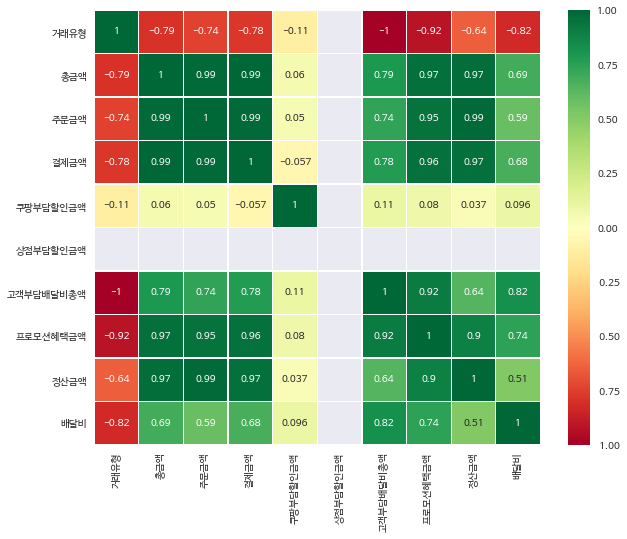

In [219]:
sns.heatmap(js_2021.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) #상관관계
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

## 취소 여부 분석

### 결제 유형별 취소

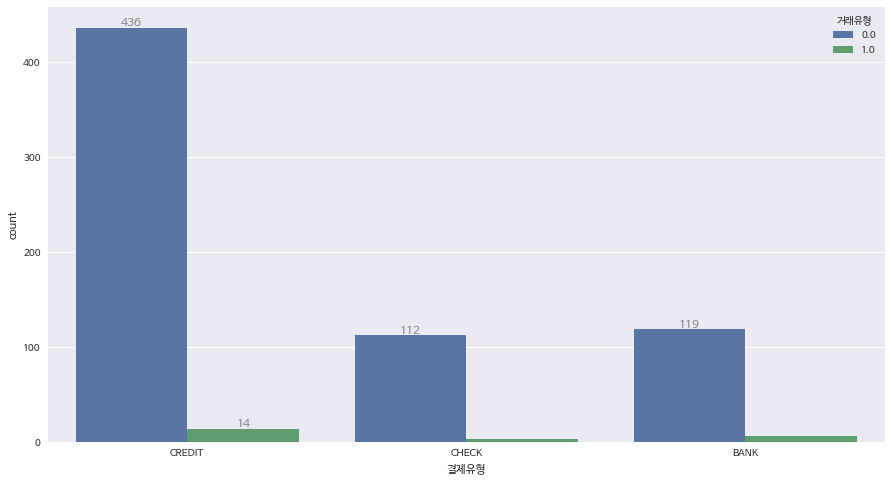

In [220]:
fig=plt.figure(figsize=(15,8))
ax=sns.countplot('결제유형', hue='거래유형', data=js_2021)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x()+p.get_width()/2., p.get_height()-10),
                ha = 'center', va='center', size=12, color='grey', xytext=(0,14), textcoords='offset points')
plt.show()

In [221]:
print('BANK 취소율: %.2f%%'%(js_2021[js_2021.결제유형=='BANK'].거래유형.mean()*100))
print('CHECK 취소율: %.2f%%'%(js_2021[js_2021.결제유형=='CHECK'].거래유형.mean()*100))
print('CREDIT 취소율: %.2f%%'%(js_2021[js_2021.결제유형=='CREDIT'].거래유형.mean()*100))

pd.crosstab(js_2021.거래유형, js_2021.결제유형, margins=True).style.background_gradient(cmap='summer_r')

BANK 취소율: 4.80%
CHECK 취소율: 2.61%
CREDIT 취소율: 3.11%


결제유형,BANK,CHECK,CREDIT,All
거래유형,,,,
0.0,119,112,436,667
1.0,6,3,14,23
All,125,115,450,690


- bank가 조금 높음
- 근데 의미 없어보임

### 시간대별 취소

In [222]:
# 시간대별 취소
print('DAY 취소율: %.2f%%'%(js_2021[js_2021.주문시간대=='DAY'].거래유형.mean()*100))
print('MID 취소율: %.2f%%'%(js_2021[js_2021.주문시간대=='MID'].거래유형.mean()*100))
print('EVENING 취소율: %.2f%%'%(js_2021[js_2021.주문시간대=='EVENING'].거래유형.mean()*100))

pd.crosstab(js_2021.거래유형, js_2021.주문시간대, margins=True).style.background_gradient(cmap='summer_r')


DAY 취소율: 2.30%
MID 취소율: 2.44%
EVENING 취소율: 9.78%


주문시간대,DAY,EVENING,MID,All
거래유형,,,,
0.0,424,83,160,667
1.0,10,9,4,23
All,434,92,164,690


- 저녁시간대의 취소율이 높음

### 금액별 취소

In [223]:
js_2021.groupby('거래유형')['주문금액'].mean()

거래유형
0.0    16604.947526
1.0   -16582.608696
Name: 주문금액, dtype: float64

- 금액과 취소는 큰 의미 없어보임

### 할인금액별 취소

In [224]:
js_2021.groupby('거래유형')['쿠팡부담할인금액'].mean()

거래유형
0.0    331.184408
1.0   -290.434783
Name: 쿠팡부담할인금액, dtype: float64

- 약 40원 차이 -> 의미 없음

### 배달수수료별 취소

In [225]:
js_2021.groupby('거래유형')['배달비'].mean()

거래유형
0.0    3242.878561
1.0   -3391.304348
Name: 배달비, dtype: float64

- 이것도 별 차이 없음

### 빵 종류별 취소율

In [226]:
bread_df

,PAY,CANCEL,비고
먹물 치즈 치아바타,435,14,추천
크로와상,313,13,추천
치아바타,259,5,추천
뺑오쇼콜라,181,7,-
아몬드 크로와상,153,4,-
먹물 유자 크림치즈,152,6,추천
아메리카노,148,4,-
블랙올리브 치아바타,146,7,-
스콘,145,10,추천
레몬 마들렌,127,3,-


In [227]:
bread_df['취소율'] = (bread_df.CANCEL / (bread_df.PAY+bread_df.CANCEL))*100
bread_df['취소 중 비율'] = (bread_df.CANCEL / bread_df.CANCEL.sum())*100
bread_df.sort_values(by='취소율', ascending=False)

,PAY,CANCEL,비고,취소율,취소 중 비율
크렌베리 치아바타,97,8,-,7.619048,6.779661
크렌베리 스콘,74,6,-,7.500000,5.084746
초코 스콘,53,4,-,7.017544,3.389831
빵드미,27,2,-,6.896552,1.694915
바질페스토 스콘,29,2,-,6.451613,1.694915
스콘,145,10,추천,6.451613,8.474576
브리오슈,49,3,-,5.769231,2.542373
사워도우,17,1,-,5.555556,0.847458
올리브오일,87,5,-,5.434783,4.237288
블랙올리브 치아바타,146,7,-,4.575163,5.932203


In [228]:
bread_df.sort_values(by='취소 중 비율', ascending=False)

,PAY,CANCEL,비고,취소율,취소 중 비율
먹물 치즈 치아바타,435,14,추천,3.118040,11.864407
크로와상,313,13,추천,3.987730,11.016949
스콘,145,10,추천,6.451613,8.474576
크렌베리 치아바타,97,8,-,7.619048,6.779661
블랙올리브 치아바타,146,7,-,4.575163,5.932203
뺑오쇼콜라,181,7,-,3.723404,5.932203
크렌베리 스콘,74,6,-,7.500000,5.084746
먹물 유자 크림치즈,152,6,추천,3.797468,5.084746
올리브오일,87,5,-,5.434783,4.237288
치아바타,259,5,추천,1.893939,4.237288


- 크랜베리 종류들의 취소율 & 취소 빵들 중 비율이 조금 높음
- 유의미한지는 흐음..

## 빵 종류별 매출

In [229]:
bread_df['취소율'].mean()

3.2022590057248905

In [230]:
bread_df.reset_index(inplace=True)
bread_df.rename(columns={'index':'BREAD'}, inplace=True)

In [231]:
print('평균 취소율:', bread_df['취소율'].mean())
bread_df

평균 취소율: 3.2022590057248905


,BREAD,PAY,CANCEL,비고,취소율,취소 중 비율
0,먹물 치즈 치아바타,435,14,추천,3.118040,11.864407
1,크로와상,313,13,추천,3.987730,11.016949
2,치아바타,259,5,추천,1.893939,4.237288
3,뺑오쇼콜라,181,7,-,3.723404,5.932203
4,아몬드 크로와상,153,4,-,2.547771,3.389831
5,먹물 유자 크림치즈,152,6,추천,3.797468,5.084746
6,아메리카노,148,4,-,2.631579,3.389831
7,블랙올리브 치아바타,146,7,-,4.575163,5.932203
8,스콘,145,10,추천,6.451613,8.474576
9,레몬 마들렌,127,3,-,2.307692,2.542373


- 압도적으로 추천 빵들이 많이 팔림
- 매출이 적은 빵들 중에는 하루에 생산되는 양이 적은 것들도 있음

- **보스톡**: 하루 **10개** 내외로 생산됨
- **바게트**: 하루 **8개** 생산됨
- **초코 브리오슈**: 하루 **약 8개** 생산됨
- **라즈베리크럼블**: 하루 **약 8개** 생산됨
- **푸가스**: 주중에는 **6개**, 주말에는 **8개** 생산됨
- **빵드미**: 하루 **7개** 생산됨
- **멀티그레인 빵드미**: 하루 **7개** 생산됨
- **통밀빵**: 하루 **4개** 생산됨
- **사워도우**: 하루 **2개** 생산됨

- 특히 이런 빵들은 매장에서 먼저 매진되거나 한 두 개가 남아 매진처리되는 경우가 많으므로 이러한 점을 고려해야함

- **브리오슈, 라즈베리 크럼블, 바질페스토 스콘** 등은 실제 매장에서는 굉장히 많이 팔리고 찾는 손님이 많은 빵임
- 그러나 배달앱에서는 상대적으로 주문이 들어오는 수량이 적음
- 뒤에 할인 금액이 커질수록 매출이 증가함 & 제이스레시피는 상점 부담 할인 금액이 없음
- 따라서 위의 세 가지 빵들을 **리뷰이벤트** 등으로 제공하는 것은 어떨까
- 금액적으로 부담이 된다면 리뷰이벤트 용으로 작게 생산하거나 적당한 크기로 컷팅해서 제공하는 것도 방법인 듯 하다
- 특히, 배달 주문에 있어서 리뷰의 수가 꽤나 중요한 영향을 미친다. 그러나 제이스레시피는 약 3년 동안 쿠팡이츠에 입점되어있음에도 **리뷰 수가 약 140개로 적은 편**이다.
- 그럼에도 불구하고 리뷰이벤트 등이 없어도 손님들이 자발적으로 좋은 리뷰를 올려주시며 별점 평균이 5점이다.
- 그러므로 **리뷰이벤트 등으로 리뷰의 수를 늘린다면 처음 주문하려고 하는 손님들에게 더 신뢰를 주어 매출을 늘릴 수 있을 것**이라고 생각된다.

### 사진 여부 별 매출

In [232]:
pic = ['크로와상', '스콘', '치아바타', '먹물 유자 크림치즈', '먹물 치즈 치아바타', '블랙올리브 치아바타']

In [233]:
bread_df['photo']='-'
bread_df.loc[bread_df.BREAD.isin(pic), 'photo']='사진'

In [234]:
bread_df

,BREAD,PAY,CANCEL,비고,취소율,취소 중 비율,photo
0,먹물 치즈 치아바타,435,14,추천,3.118040,11.864407,사진
1,크로와상,313,13,추천,3.987730,11.016949,사진
2,치아바타,259,5,추천,1.893939,4.237288,사진
3,뺑오쇼콜라,181,7,-,3.723404,5.932203,-
4,아몬드 크로와상,153,4,-,2.547771,3.389831,-
5,먹물 유자 크림치즈,152,6,추천,3.797468,5.084746,사진
6,아메리카노,148,4,-,2.631579,3.389831,-
7,블랙올리브 치아바타,146,7,-,4.575163,5.932203,사진
8,스콘,145,10,추천,6.451613,8.474576,사진
9,레몬 마들렌,127,3,-,2.307692,2.542373,-


- 사진이 있는 빵이 추천빵이라서 그런건지 사진 있는 빵들의 주문량이 많음

- 이름이 생소할 수 있으면서 사진도 없는 빵들의 매출?
- 호두 크랜베리 캉파뉴, 보스톡, 무화과 사워도우, 브리오슈, 초코 브리오슈, 라즈베리 크럼블, 푸가스, 사워도우

In [235]:
unknown = ['호두 크렌베리 캉파뉴', '보스톡', '무화과 사워도우', '브리오슈', '초코 브리오슈', '라즈베리 크럼블', '푸가스', '사워도우']
bread_df.loc[bread_df.BREAD.isin(unknown), :]

,BREAD,PAY,CANCEL,비고,취소율,취소 중 비율,photo
15,호두 크렌베리 캉파뉴,86,3,-,3.370787,2.542373,-
20,보스톡,53,1,-,1.851852,0.847458,-
21,무화과 사워도우,50,0,-,0.000000,0.000000,-
22,브리오슈,49,3,-,5.769231,2.542373,-
25,초코 브리오슈,34,0,-,0.000000,0.000000,-
27,푸가스,29,0,-,0.000000,0.000000,-
28,라즈베리 크럼블,29,0,-,0.000000,0.000000,-
31,사워도우,17,1,-,5.555556,0.847458,-


대부분의 빵들의 주문량이 하위권임 **=> 이름이 생소한 빵들에 사진을 추가해야할 듯**

## 할인과 매출

In [236]:
js_2021.groupby('쿠팡부담할인금액')['주문금액'].agg(['mean', 'count'])

,mean,count
쿠팡부담할인금액,,
-2680.0,-13400.000000,1
-2000.0,-13250.000000,2
0.0,15622.838499,613
1000.0,14226.666667,15
2000.0,15380.000000,15
2900.0,14500.000000,1
3000.0,16120.000000,20
4000.0,19200.000000,2
5000.0,16085.714286,21


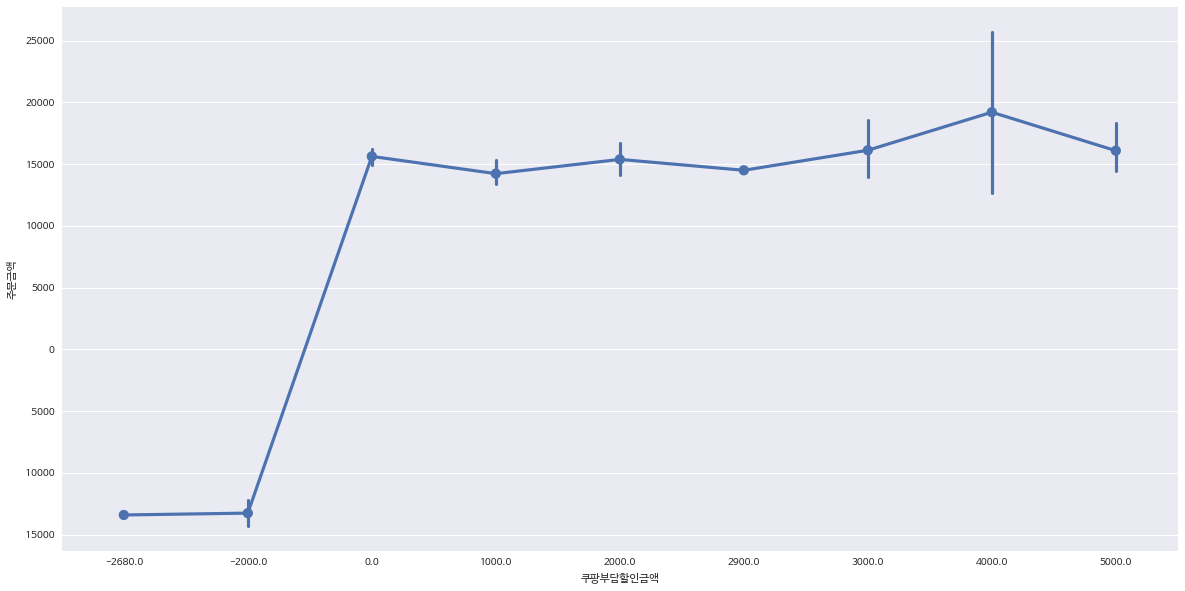

In [237]:
plt.figure( figsize=(20,10))
sns.pointplot('쿠팡부담할인금액', '주문금액', data=js_2021)
plt.show()

- 할인금액이 커진다고 매출이 늘어나는 것은 아닌 듯
- 그래도 3000원 이상의 쿠폰을 주면 약간의 매출 상승 효과는 있는 것으로 보임

## 기간별 매출

In [238]:
js_pay = js_2021[~(js_2021.거래유형==1)]
js_pay.reset_index(drop=True, inplace=True)
js_cancel = js_2021[~(js_2021.거래유형==0)]
js_cancel.reset_index(drop=True, inplace=True)

In [239]:
js_pay['거래일']=js_pay['거래일시'].apply(lambda x: str(x)[:10])

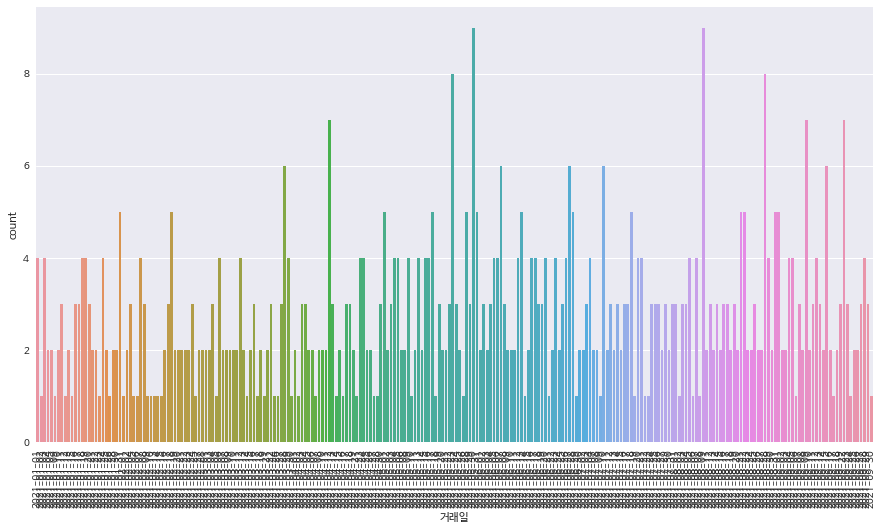

In [240]:
plt.figure(figsize=(15,8))
sns.countplot('거래일', data=js_pay)
plt.xticks(rotation=90)
plt.show()

- 월별로 주문량의 뚜렷한 추이는 없는 것으로 보임

### 일별 매출

In [241]:
js_pay['일매출누계']=0
js_pay['일매출평균']=0
js_pay.loc[0, '일매출누계'] = js_pay.loc[0, '주문금액']
cnt=0
for i in range(1,len(js_pay)):
    cnt+=1
    
    if (js_pay.loc[i,'거래일시'].day != js_pay.loc[i-1,'거래일시'].day):
        js_pay.loc[i-1, '일매출평균']=round(js_pay.loc[i-1, '일매출누계']/cnt)
        js_pay.loc[i, '일매출누계'] = js_pay.loc[i, '주문금액']
        cnt=0
    else:
        js_pay.loc[i, '일매출누계'] = js_pay.loc[i,'주문금액']+js_pay.loc[i-1, '일매출누계']

In [242]:
js_pay[js_pay.일매출평균>0]

,거래일시,결제유형,주문아이디,거래유형,주문내역,총금액,주문금액,결제금액,쿠팡부담할인금액,상점부담할인금액,...,프로모션혜택금액,총공급가액,총부가세액,최종요금총액,정산금액,주문시간대,배달비,거래일,일매출누계,일매출평균
3,2021-01-01 16:39:16,BANK,2RVT80,0.0,"먹물 치즈 치아바타, 뺑오쇼콜라, 크렌베리 치아바타x2",16200.0,13200.0,14200.0,2000.0,0.0,...,4707.0,3669,367,4036,9164.0,MID,3000.0,2021-01-01,71100.0,17775
4,2021-01-02 15:42:38,CREDIT,1CH400,0.0,"크로와상, 치아바타, 먹물 치즈 치아바타, 크렌베리 스콘",16800.0,13800.0,14800.0,2000.0,0.0,...,4797.0,3687,368,4055,9745.0,MID,3000.0,2021-01-02,13800.0,13800
8,2021-01-03 16:58:35,BANK,1R3W80,0.0,"먹물 치즈 치아바타, 먹물 유자 크림치즈, 치아바타, 크로와상, 무화과 사워도우, ...",21800.0,18800.0,19800.0,2000.0,0.0,...,5547.0,3837,383,4220,14580.0,MID,3000.0,2021-01-03,60900.0,15225
10,2021-01-04 15:19:54,BANK,273U80,0.0,"스콘x2, 초코 스콘, 치아바타",15500.0,12500.0,10500.0,5000.0,0.0,...,4602.0,3648,365,4013,8487.0,MID,3000.0,2021-01-04,24700.0,12350
12,2021-01-05 12:08:58,CREDIT,2EAGG0,0.0,"스콘, 먹물 치즈 치아바타x3, 녹차 스콘, 얼그레이 스콘, 무화과 사워도우",30500.0,27500.0,30500.0,0.0,0.0,...,6852.0,4098,410,4508,22992.0,DAY,3000.0,2021-01-05,42500.0,21250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,2021-09-25 14:23:32,CHECK,2URB00,0.0,"치아바타, 먹물 치즈 치아바타, 아몬드 크로와상, 라즈베리 크럼블",17700.0,14700.0,14700.0,3000.0,0.0,...,4932.0,3714,371,4085,10615.0,DAY,3000.0,2021-09-25,34800.0,17400
655,2021-09-26 16:35:56,CREDIT,0B39R0,0.0,"먹물 치즈 치아바타x2, 크로와상",15000.0,12000.0,15000.0,0.0,0.0,...,4527.0,3633,363,3996,8004.0,MID,3000.0,2021-09-26,32600.0,16300
658,2021-09-27 17:49:16,CREDIT,0DP4G0,0.0,"크렌베리 치아바타x2, 곡물 치아바타, 크로와상, 치아바타",17900.0,14900.0,17900.0,0.0,0.0,...,4962.0,3720,372,4092,10808.0,EVENING,3000.0,2021-09-27,64600.0,21533
662,2021-09-28 19:54:20,BANK,13V5G0,0.0,"먹물 치즈 치아바타, 크로와상, 레몬 마들렌, 바게트, 크렌베리 치아바타",18200.0,15200.0,18200.0,0.0,0.0,...,5007.0,3729,373,4102,11098.0,EVENING,3000.0,2021-09-28,57000.0,14250


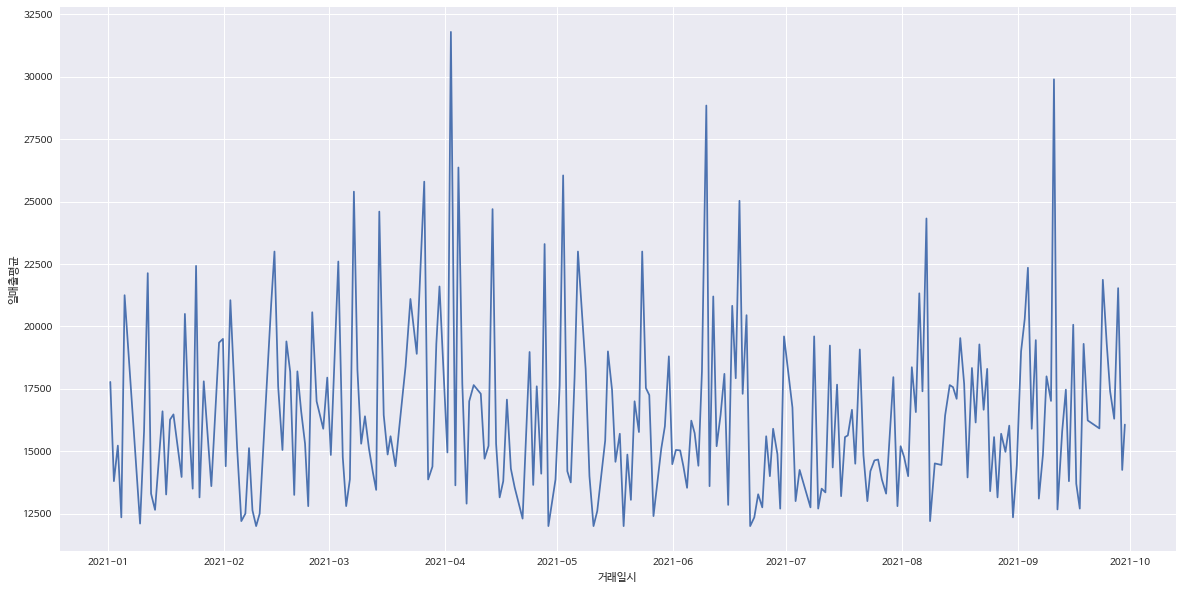

In [243]:
plt.figure( figsize=(20,10))
sns.lineplot('거래일시', '일매출평균', data=js_pay[js_pay.일매출평균>0])
plt.show()

- 일별 매출로 봤을 때는 크게 변화되는 추이 파악 어려움

### 월별 매출

In [244]:
js_pay['월매출평균']=0
cnt=0
for i in range(1,len(js_pay)):    
    if (js_pay.loc[i,'거래일시'].month != js_pay.loc[i-1,'거래일시'].month):
        mnth = js_pay.loc[i, '거래일시'].month
        js_pay.loc[i-1, '월매출평균']=round(js_pay.loc[(js_pay['거래일시']>=datetime(2021, mnth-1, 1))&(js_pay['거래일시']<datetime(2021, mnth, 1)), '주문금액'].mean())
        
js_pay.loc[len(js_pay)-1, '월매출평균']=round(js_pay.loc[(js_pay['거래일시']>=datetime(2021, 9, 1)), '주문금액'].mean())

In [245]:
js_pay[js_pay.월매출평균>0]

,거래일시,결제유형,주문아이디,거래유형,주문내역,총금액,주문금액,결제금액,쿠팡부담할인금액,상점부담할인금액,...,총공급가액,총부가세액,최종요금총액,정산금액,주문시간대,배달비,거래일,일매출누계,일매출평균,월매출평균
60,2021-01-31 18:24:05,BANK,0BB0R0,0.0,"크로와상x2, 치아바타x2",15000.0,12000.0,15000.0,0.0,0.0,...,3633,363,3996,8004.0,EVENING,3000.0,2021-01-31,97500.0,19500,16708
108,2021-02-28 14:42:33,CREDIT,1PGP00,0.0,"크로와상x2, 뺑오쇼콜라, 초코 스콘, 브리오슈x2, 빵드미",26600.0,23600.0,26600.0,0.0,0.0,...,3981,398,4379,19221.0,DAY,3000.0,2021-02-28,35900.0,17950,16438
167,2021-03-30 13:44:56,BANK,2TH980,0.0,"먹물 치즈 치아바타x3, 블랙올리브 치아바타x2, 크렌베리 치아바타",24600.0,21600.0,24600.0,0.0,0.0,...,3921,392,4313,17287.0,DAY,3000.0,2021-03-30,21600.0,21600,16708
227,2021-04-30 12:59:20,CHECK,2W2WG0,0.0,"뺑오쇼콜라, 아몬드 크로와상, 브리오슈, 레몬 마들렌x2",16000.0,13000.0,16000.0,0.0,0.0,...,3663,366,4029,8971.0,DAY,3000.0,2021-04-30,41600.0,13867,16658
322,2021-05-31 17:14:44,CREDIT,0TW7R0,0.0,"크로와상, 치아바타x2, 아몬드 크로와상",15700.0,12700.0,15700.0,0.0,0.0,...,3654,365,4019,8681.0,EVENING,3000.0,2021-05-31,72400.0,14480,16889
415,2021-06-30 13:08:12,CREDIT,1S2780,0.0,"치아바타, 아몬드 크로와상, 초코 브리오슈, 무화과 사워도우, 라즈베리 크럼블, 푸가스",24800.0,21800.0,24800.0,0.0,0.0,...,3927,392,4319,17481.0,DAY,3000.0,2021-06-30,39200.0,19600,16466
488,2021-07-31 16:11:06,BANK,0JU8G0,0.0,"크로와상x3, 먹물 치즈 치아바타",16500.0,13500.0,16500.0,0.0,0.0,...,3678,368,4046,9454.0,MID,3000.0,2021-07-31,45600.0,15200,15286
582,2021-08-31 16:34:42,BANK,0AEK80,0.0,"먹물 치즈 치아바타, 올리브오일, 얼그레이 스콘, 아몬드 크로와상",15700.0,12700.0,15700.0,0.0,0.0,...,3654,365,4019,8681.0,MID,3000.0,2021-08-31,72200.0,14440,16612
666,2021-09-30 12:40:11,CREDIT,1MXXR0,0.0,"크로와상, 스콘x2, 치아바타",15000.0,12000.0,15000.0,0.0,0.0,...,3633,363,3996,8004.0,DAY,3000.0,2021-09-30,12000.0,0,17486


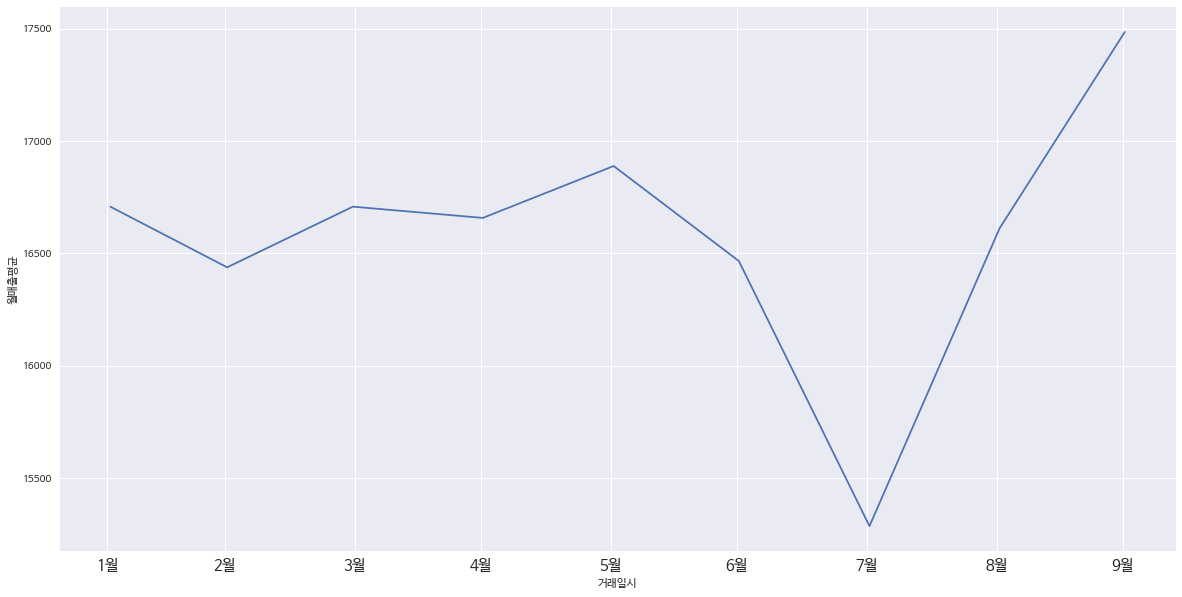

In [246]:
plt.figure( figsize=(20,10))
sns.lineplot('거래일시', '월매출평균', data=js_pay[js_pay.월매출평균>0])
plt.xticks([datetime(2021,1,31), datetime(2021,2,28), datetime(2021,3,31),datetime(2021,4,30),datetime(2021,5,31),datetime(2021,6,30),datetime(2021,7,31),datetime(2021,8,31),datetime(2021,9,30)],
           ['1월', '2월','3월','4월','5월','6월','7월','8월','9월'], size=15)
plt.show()

- 매출이 점차 증가하는 듯 보이긴 하지만 1000원 내외로 매우 근소한 차이임
- 7월 매출의 감소는 왜?

### 분기별 매출

In [247]:
print('1분기 매출 평균: ', round(js_q1.loc[js_q1.거래유형=='PAY', '주문금액'].mean()),'원')
print('2분기 매출 평균: ', round(js_q2.loc[js_q2.거래유형=='PAY', '주문금액'].mean()),'원')
print('3분기 매출 평균: ', round(js_q3.loc[js_q3.거래유형=='PAY', '주문금액'].mean()),'원')

1분기 매출 평균:  16631 원
2분기 매출 평균:  16675 원
3분기 매출 평균:  16519 원


- 역시나 증가 없음

### 시간대별 매출

In [248]:
print('DAY 평균 매출:',round(js_2021.loc[js_2021.주문시간대=='DAY', '주문금액'].mean()),'원')
print('MID 평균 매출:',round(js_2021.loc[js_2021.주문시간대=='MID', '주문금액'].mean()),'원')
print('EVENING 평균 매출:',round(js_2021.loc[js_2021.주문시간대=='EVENING', '주문금액'].mean()),'원')

DAY 평균 매출: 16043 원
MID 평균 매출: 15554 원
EVENING 평균 매출: 12834 원


- 낮>미들>저녁 시간 순으로 매출이 감소됨
- 그런데 빵 양이 저녁이 될수록 줄어 품절되는 경우가 많음
- 이러한 특징 때문에 매출이 적어지는 것일 수도 있음

# +) 로지스틱 회귀

In [249]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [250]:
js_2021

,거래일시,결제유형,주문아이디,거래유형,주문내역,총금액,주문금액,결제금액,쿠팡부담할인금액,상점부담할인금액,...,주문중개수수료,배달요금,고객부담배달비총액,프로모션혜택금액,총공급가액,총부가세액,최종요금총액,정산금액,주문시간대,배달비
0,2021-01-01 12:10:50,CREDIT,1BW780,0.0,"뺑오쇼콜라x2, 크로와상, 치아바타, 먹물 유자 크림치즈, 크렌베리 스콘",22200.0,19200.0,20200.0,2000.0,0.0,...,1000,5000,3000.0,5607.0,3849,385,4234,14966.0,DAY,3000.0
1,2021-01-01 14:29:07,CHECK,2RJPG0,0.0,"스콘, 치아바타x2, 호두 크렌베리 캉파뉴, 올리브오일, 레몬 마들렌x2",20000.0,17000.0,18000.0,2000.0,0.0,...,1000,5000,3000.0,5277.0,3783,378,4161,12839.0,DAY,3000.0
2,2021-01-01 14:46:06,CREDIT,17XM80,0.0,"크렌베리 스콘x2, 크렌베리 치아바타x2, 먹물 유자 크림치즈, 아몬드 크로와상, ...",24700.0,21700.0,22700.0,2000.0,0.0,...,1000,5000,3000.0,5982.0,3924,392,4316,17384.0,DAY,3000.0
3,2021-01-01 16:39:16,BANK,2RVT80,0.0,"먹물 치즈 치아바타, 뺑오쇼콜라, 크렌베리 치아바타x2",16200.0,13200.0,14200.0,2000.0,0.0,...,1000,5000,3000.0,4707.0,3669,367,4036,9164.0,MID,3000.0
4,2021-01-01 17:00:55,CREDIT,2VUCR0,1.0,"치아바타, 블랙올리브 치아바타, 바게트, 스콘",-15200.0,-12200.0,-13200.0,-2000.0,0.0,...,-1000,-5000,-3000.0,-4557.0,-3639,-364,-4003,-8197.0,EVENING,-3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,2021-09-29 12:06:56,CREDIT,2695R0,0.0,"뺑오쇼콜라, 아메리카노, 바게트, 보스톡, 라즈베리 크럼블, 먹물 치즈 치아바타, ...",26600.0,23600.0,26600.0,0.0,0.0,...,1000,5000,3000.0,6267.0,3981,398,4379,19221.0,DAY,3000.0
686,2021-09-29 12:12:11,CREDIT,11FPR0,0.0,"먹물 치즈 치아바타x2, 뺑오쇼콜라",15300.0,12300.0,15300.0,0.0,0.0,...,1000,5000,3000.0,4572.0,3642,364,4006,8294.0,DAY,3000.0
687,2021-09-29 12:46:50,CREDIT,00PBR0,0.0,"푸가스 , 먹물 치즈 치아바타, 곡물 치아바타",15300.0,12300.0,15300.0,0.0,0.0,...,1000,5000,3000.0,4572.0,3642,364,4006,8294.0,DAY,3000.0
688,2021-09-30 12:40:11,CREDIT,1MXXR0,0.0,"크로와상, 스콘x2, 치아바타",15000.0,12000.0,15000.0,0.0,0.0,...,1000,5000,3000.0,4527.0,3633,363,3996,8004.0,DAY,3000.0


In [251]:
js_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   거래일시         690 non-null    datetime64[ns]
 1   결제유형         690 non-null    object        
 2   주문아이디        690 non-null    object        
 3   거래유형         690 non-null    float64       
 4   주문내역         690 non-null    object        
 5   총금액          690 non-null    float64       
 6   주문금액         690 non-null    float64       
 7   결제금액         690 non-null    float64       
 8   쿠팡부담할인금액     690 non-null    float64       
 9   상점부담할인금액     690 non-null    float64       
 10  서비스수수료       690 non-null    object        
 11  카드수수료_결제이용료  690 non-null    object        
 12  배달수수료        690 non-null    object        
 13  주문중개수수료      690 non-null    object        
 14  배달요금         690 non-null    object        
 15  고객부담배달비총액    690 non-null    float64       
 16  프로모션혜택금액

In [252]:
X=js_2021.iloc[:,[1,6,8,10,11,16,19,20,21,22]]
X

,결제유형,주문금액,쿠팡부담할인금액,서비스수수료,카드수수료_결제이용료,프로모션혜택금액,최종요금총액,정산금액,주문시간대,배달비
0,CREDIT,19200.0,2000.0,2880,576,5607.0,4234,14966.0,DAY,3000.0
1,CHECK,17000.0,2000.0,2550,510,5277.0,4161,12839.0,DAY,3000.0
2,CREDIT,21700.0,2000.0,3255,651,5982.0,4316,17384.0,DAY,3000.0
3,BANK,13200.0,2000.0,1980,396,4707.0,4036,9164.0,MID,3000.0
4,CREDIT,-12200.0,-2000.0,-1830,-366,-4557.0,-4003,-8197.0,EVENING,-3000.0
...,...,...,...,...,...,...,...,...,...,...
685,CREDIT,23600.0,0.0,3540,708,6267.0,4379,19221.0,DAY,3000.0
686,CREDIT,12300.0,0.0,1845,369,4572.0,4006,8294.0,DAY,3000.0
687,CREDIT,12300.0,0.0,1845,369,4572.0,4006,8294.0,DAY,3000.0
688,CREDIT,12000.0,0.0,1800,360,4527.0,3996,8004.0,DAY,3000.0


In [253]:
X['결제유형'].replace(['CREDIT', 'CHECK', 'BANK'], [0,1,2], inplace=True)
X['주문시간대'].replace(['DAY', 'MID', 'EVENING'], [0,1,2], inplace=True)
X=X.astype('float')

In [254]:
X[X<0]=-X[X<0]

In [255]:
X

,결제유형,주문금액,쿠팡부담할인금액,서비스수수료,카드수수료_결제이용료,프로모션혜택금액,최종요금총액,정산금액,주문시간대,배달비
0,0.0,19200.0,2000.0,2880.0,576.0,5607.0,4234.0,14966.0,0.0,3000.0
1,1.0,17000.0,2000.0,2550.0,510.0,5277.0,4161.0,12839.0,0.0,3000.0
2,0.0,21700.0,2000.0,3255.0,651.0,5982.0,4316.0,17384.0,0.0,3000.0
3,2.0,13200.0,2000.0,1980.0,396.0,4707.0,4036.0,9164.0,1.0,3000.0
4,0.0,12200.0,2000.0,1830.0,366.0,4557.0,4003.0,8197.0,2.0,3000.0
...,...,...,...,...,...,...,...,...,...,...
685,0.0,23600.0,0.0,3540.0,708.0,6267.0,4379.0,19221.0,0.0,3000.0
686,0.0,12300.0,0.0,1845.0,369.0,4572.0,4006.0,8294.0,0.0,3000.0
687,0.0,12300.0,0.0,1845.0,369.0,4572.0,4006.0,8294.0,0.0,3000.0
688,0.0,12000.0,0.0,1800.0,360.0,4527.0,3996.0,8004.0,0.0,3000.0


In [256]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   결제유형         690 non-null    float64
 1   주문금액         690 non-null    float64
 2   쿠팡부담할인금액     690 non-null    float64
 3   서비스수수료       690 non-null    float64
 4   카드수수료_결제이용료  690 non-null    float64
 5   프로모션혜택금액     690 non-null    float64
 6   최종요금총액       690 non-null    float64
 7   정산금액         690 non-null    float64
 8   주문시간대        690 non-null    float64
 9   배달비          690 non-null    float64
dtypes: float64(10)
memory usage: 54.0 KB


In [257]:
y=js_2021[['거래유형']]
y

,거래유형
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
685,0.0
686,0.0
687,0.0
688,0.0


In [258]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.3, random_state=0)
y_train = y_train.values.ravel() #Numpy 다차원 배열을 1차원으로 바꿈, 경고 무시용

In [259]:
from sklearn.metrics import accuracy_score, roc_auc_score

#로지스틱 회귀 모델 객체 생성
lr_clf = LogisticRegression()

# 학습 데이터를 이용해서 모델을 학습
lr_clf.fit(X_train, y_train)

# 분리해놨던 테스트 데이터로 각 데이터 분류를 예측
lr_preds = lr_clf.predict (X_test)

lr_preds

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [260]:
print( 'accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print( 'roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy: 0.961
roc_auc: 0.500
